# WUR Leaf Counting Evaluation

## Introduction

I have used the Pheno-DeepCounter [1] architecture (ResNet-50) and trained the network from scatch and pretrained it using the CVPPP dataset, as in [2].

Before training, WUR images were resized to 320x320

The WUR dataset contains two species of Kale, divided in two group. One group is used as training, the other group (the one marked with "b") as testing. The 20% of the testing set has been used as validation set.

The images selected for the validation set are the 20% wrt the plant ID. This means that if I select plant 1 to be in the validation set, all the images of that plant throught its life span are also taken. I do that because I do not want to have images of the same plant in both validation and testing set, although they are at different level of development

In [1]:
import pandas as pd
import sys
import numpy as np
import pylab
import matplotlib as mpl
sys.path.append('../')
from network_keras import compute_metrics, print_metrics
from os.path import join
from matplotlib import pyplot as plt

%matplotlib inline

Using TensorFlow backend.


## Dataset Overview

In [2]:
basepath = "/media/PHDDATA/Data/Plant Phenotyping/Wageningen Data"
species_1_training = pd.read_csv(join(basepath,"Kale Species 1.csv")).iloc[:,1]
species_1_testing  = pd.read_csv(join(basepath,"Kale Species 1b.csv")).iloc[:,1]

species_2_training = pd.read_csv(join(basepath,"Kale Species 2.csv")).iloc[:,1]
species_2_testing  = pd.read_csv(join(basepath,"Kale Species 2b.csv")).iloc[:,1]

### Species 1 - Training and Testing Set Leaf Count Distribution

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


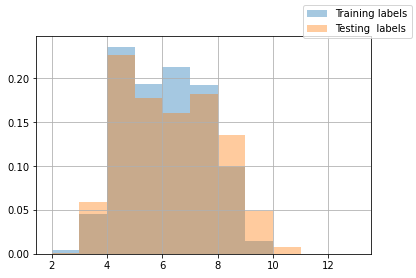

In [3]:
fig = plt.figure()
ax = fig.gca()

species_1_training.hist(ax=ax,label='Training labels', density=True, alpha=0.4, range=(2,12),bins=range(2,14))
species_1_testing.hist (ax=ax,label='Testing  labels', density=True, alpha=0.4, range=(2,12),bins=range(2,14))

fig.legend()
fig.show()


### Species 2 - Training and Testing Set Leaf Count Distribution

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


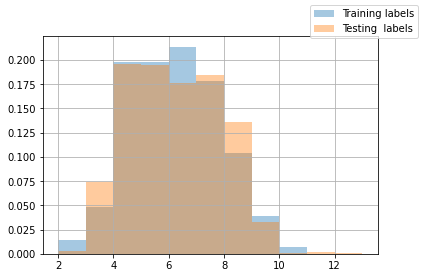

In [4]:
fig = plt.figure()
ax = fig.gca()

species_2_training.hist(ax=ax,label='Training labels', density=True, alpha=0.4,range=(0,12),bins=range(2,14))
species_2_testing.hist (ax=ax,label='Testing  labels', density=True, alpha=0.4,range=(0,12),bins=range(2,14))

fig.legend()
fig.show()

### Species All - Training and Testing Set Leaf Count Distribution

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


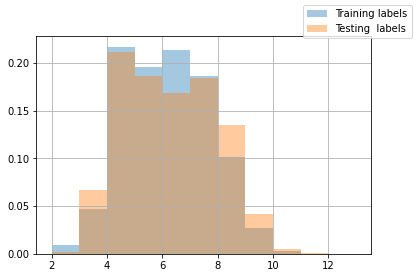

In [5]:
species_all_training = pd.concat([species_1_training,species_2_training])
species_all_testing = pd.concat([species_1_testing,species_2_testing])

fig = plt.figure()
ax = fig.gca()

species_all_training.hist(ax=ax,label='Training labels', density=True, alpha=0.4,range=(0,12),bins=range(2,14))
species_all_testing.hist (ax=ax,label='Testing  labels', density=True, alpha=0.4,range=(0,12),bins=range(2,14))

fig.legend()
fig.show()

### Remarks

The reason why I plotted the labels is to check whether class imbalance was present in the dataset, thus biasing the training of the neural network. Overall, it seems that no major skew is present in the dataset (good), although it appeans to me that some labels are missing (bad). Overall, the amount of missing labels is not big and we can cope with that at the moment (no worries).

In [6]:
def check_missing(val,rng):
    for i in rng:
        if (i not in val):
            print("Value {} is missing!".format(i))
            
print("Missing labels in the Kale 1 Training Set:")
check_missing(set(species_1_training.values),range(2,11))

print("\nMissing labels in the Kale 1 Testing Set:")
check_missing(set(species_1_testing.values),range(2,11))

print("Missing labels in the Kale 2 Training Set:")
check_missing(set(species_2_training.values),range(2,13))

print("\nMissing labels in the Kale 1 Testing Set:")
check_missing(set(species_2_testing.values),range(2,13))

Missing labels in the Kale 1 Training Set:
Value 10 is missing!

Missing labels in the Kale 1 Testing Set:
Missing labels in the Kale 2 Training Set:
Value 11 is missing!
Value 12 is missing!

Missing labels in the Kale 1 Testing Set:


## Experimental Results

In [7]:

#this is an auxilary function I need to display results per each split

def show_individual_metrics(res):
    train = res['Train'].values
    test = res['Test'].values
    
    print("> Train Results")
    print_metrics(compute_metrics(train[:,0],train[:,1]))
    
    print("\n> Test Results")
    print_metrics(compute_metrics(test[:,0],test[:,1]))
    
    return (train,test)

#this function prints all the metrics per each experiment
def display_results(fmt):
    results = read_xlsx(fmt,sheets=[0,1])

    numpy_arr_test = []

    for (i,r) in enumerate(results):
        print("==== Results for the individual split {} ====\n".format(i))
        _,test_np = show_individual_metrics(r)
        numpy_arr_test.append(test_np)

    cv_res = np.concatenate(numpy_arr_test)

    print("\n\n==== Cross-Validation Metrics ====".format(i))
    print_metrics(compute_metrics(cv_res[:,0],cv_res[:,1]))
    
    return cv_res

### Training the network from scratch
#### Training: Species 1 - Testing: Species 1

==== Training Results ====
DIC ....: 0.058 (0.34)
|DIC| ..: 0.12 (0.33)
MSE ....: 0.12
Accuracy: 0.88
R2 .....: 0.95
==== Testing Results ====
DIC ....: -0.2 (1.0)
|DIC| ..: 0.75 (0.71)
MSE ....: 1.1
Accuracy: 0.4
R2 .....: 0.67


/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


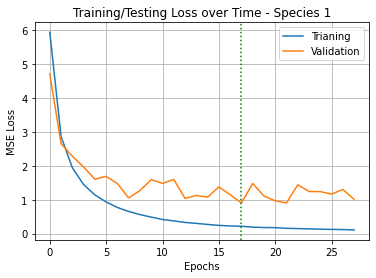

In [8]:
scratch_species_1 = pd.read_excel("wur_species1_scratch.xlsx",sheet_name=["Train","Test"])
df = pd.read_csv("wur_species1_scratch.csv")
train, test = tuple([scratch_species_1['Train'].values,scratch_species_1['Test'].values])

scratch_species_1_metrics = (compute_metrics(train[:,0],train[:,1]),compute_metrics(test[:,0],test[:,1]))

print("==== Training Results ====")
print_metrics(scratch_species_1_metrics[0])

print("==== Testing Results ====")
print_metrics(scratch_species_1_metrics[1])

fig = plt.figure()
ax = fig.gca()

ax = df.plot(x='epoch',ax=ax,title='Training/Testing Loss over Time - Species 1',grid=True)

ax.axvline(x=df.shape[0]-11,color='green',linestyle=':')

ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')

ax.legend(["Trianing","Validation"])

fig.show()

scratch_species_1_test = scratch_species_1_metrics[1]

The dashed green line marks the best perfoming model wrt validation (model used for the testing)

#### Training: Species 2 - Testing: Species 2

==== Training Results ====
DIC ....: -0.029 (0.37)
|DIC| ..: 0.13 (0.35)
MSE ....: 0.14
Accuracy: 0.87
R2 .....: 0.95
==== Testing Results ====
DIC ....: -0.41 (0.92)
|DIC| ..: 0.76 (0.66)
MSE ....: 1.0
Accuracy: 0.35
R2 .....: 0.73


/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


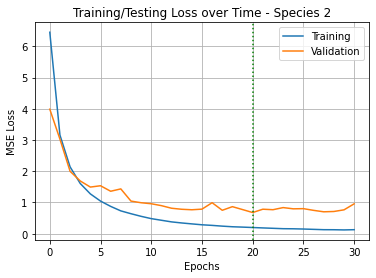

In [9]:
scratch_species_2 = pd.read_excel("wur_species2_scratch.xlsx",sheet_name=["Train","Test"])
df = pd.read_csv("wur_species2_scratch.csv")
train, test = tuple([scratch_species_2['Train'].values,scratch_species_2['Test'].values])

scratch_species_2_metrics = (compute_metrics(train[:,0],train[:,1]),compute_metrics(test[:,0],test[:,1]))

print("==== Training Results ====")
print_metrics(scratch_species_2_metrics[0])

print("==== Testing Results ====")
print_metrics(scratch_species_2_metrics[1])

fig = plt.figure()
ax = fig.gca()

ax = df.plot(x='epoch',ax=ax,title='Training/Testing Loss over Time - Species 2',grid=True)

ax.axvline(x=df.shape[0]-11,color='green',linestyle=':')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')

ax.legend(["Training","Validation"])

fig.show()

scratch_species_2_test = scratch_species_2_metrics[1]

#### Training: All - Testing: All

==== Training Results ====
DIC ....: -0.034 (0.42)
|DIC| ..: 0.18 (0.38)
MSE ....: 0.18
Accuracy: 0.82
R2 .....: 0.93
==== Testing Results ====
DIC ....: -0.18 (0.82)
|DIC| ..: 0.6 (0.59)
MSE ....: 0.7
Accuracy: 0.45
R2 .....: 0.78


/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


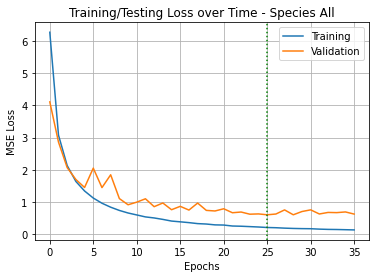

In [10]:
scratch_species_all = pd.read_excel("wur_speciesall_scratch.xlsx",sheet_name=["Train","Test"])
df = pd.read_csv("wur_speciesall_scratch.csv")
train, test = tuple([scratch_species_all['Train'].values,scratch_species_all['Test'].values])

scratch_species_all_metrics = (compute_metrics(train[:,0],train[:,1]),compute_metrics(test[:,0],test[:,1]))

print("==== Training Results ====")
print_metrics(scratch_species_all_metrics[0])

print("==== Testing Results ====")
print_metrics(scratch_species_all_metrics[1])

fig = plt.figure()
ax = fig.gca()

ax = df.plot(x='epoch',ax=ax,title='Training/Testing Loss over Time - Species All',grid=True)

ax.axvline(x=df.shape[0]-11,color='green',linestyle=':')

ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')

ax.legend(["Training","Validation"])

fig.show()

scratch_species_all_test = scratch_species_all_metrics[1]

#### Training: Species 1 - Testing Species 2

In [11]:
scratch_species_12 = pd.read_excel("wur_scratch_12.xlsx",sheet_name=["Test"])['Test'].values

scratch_species_12_metrics = compute_metrics(scratch_species_12[:,0],scratch_species_12[:,1])

print_metrics(scratch_species_12_metrics)

DIC ....: -0.21 (1.1)
|DIC| ..: 0.82 (0.72)
MSE ....: 1.2
Accuracy: 0.35
R2 .....: 0.62


#### Training: Species 2 - Testing Species 1

In [12]:
scratch_species_21 = pd.read_excel("wur_scratch_21.xlsx",sheet_name=["Test"])['Test'].values

scratch_species_21_metrics = compute_metrics(scratch_species_21[:,0],scratch_species_21[:,1])

print_metrics(scratch_species_21_metrics)

DIC ....: 0.099 (0.87)
|DIC| ..: 0.58 (0.65)
MSE ....: 0.76
Accuracy: 0.5
R2 .....: 0.75


### Pretraining using CVPPP dataset

In [13]:
# this is an auxilary function I need to load all the results file
def read_xlsx(fmt,n=4,sheets=0):
    res = []
    for i in range(n):
        res.append(pd.read_excel(fmt.format(i),sheet_name=["Train","Test"]))
        
    return res


#### Training Set: Species 1 - Testing Set: Species 1

In [14]:
exp_fname = 'wur_species1_split{}.xlsx'

species1_cvres = display_results(exp_fname)

==== Results for the individual split 0 ====

> Train Results
DIC ....: -0.064 (0.41)
|DIC| ..: 0.17 (0.38)
MSE ....: 0.17
Accuracy: 0.84
R2 .....: 0.93

> Test Results
DIC ....: -0.052 (0.86)
|DIC| ..: 0.6 (0.62)
MSE ....: 0.74
Accuracy: 0.47
R2 .....: 0.75
==== Results for the individual split 1 ====

> Train Results
DIC ....: -0.0081 (0.27)
|DIC| ..: 0.074 (0.26)
MSE ....: 0.074
Accuracy: 0.93
R2 .....: 0.97

> Test Results
DIC ....: -0.22 (0.89)
|DIC| ..: 0.64 (0.65)
MSE ....: 0.83
Accuracy: 0.46
R2 .....: 0.73
==== Results for the individual split 2 ====

> Train Results
DIC ....: -0.063 (0.59)
|DIC| ..: 0.32 (0.49)
MSE ....: 0.35
Accuracy: 0.69
R2 .....: 0.84

> Test Results
DIC ....: -0.26 (0.82)
|DIC| ..: 0.6 (0.62)
MSE ....: 0.74
Accuracy: 0.47
R2 .....: 0.77
==== Results for the individual split 3 ====

> Train Results
DIC ....: 0.099 (0.35)
|DIC| ..: 0.13 (0.34)
MSE ....: 0.13
Accuracy: 0.87
R2 .....: 0.95

> Test Results
DIC ....: -0.059 (0.85)
|DIC| ..: 0.59 (0.62)
MSE ...

#### Training Set: Species 2 - Testing Set: Species 2

In [15]:
exp_fname = 'wur_species2_split{}.xlsx'
species2_cvres = display_results(exp_fname)

==== Results for the individual split 0 ====

> Train Results
DIC ....: -0.029 (0.75)
|DIC| ..: 0.48 (0.58)
MSE ....: 0.56
Accuracy: 0.56
R2 .....: 0.79

> Test Results
DIC ....: 0.15 (0.92)
|DIC| ..: 0.66 (0.66)
MSE ....: 0.86
Accuracy: 0.43
R2 .....: 0.74
==== Results for the individual split 1 ====

> Train Results
DIC ....: -0.023 (0.2)
|DIC| ..: 0.039 (0.19)
MSE ....: 0.039
Accuracy: 0.96
R2 .....: 0.99

> Test Results
DIC ....: -0.19 (0.82)
|DIC| ..: 0.57 (0.62)
MSE ....: 0.71
Accuracy: 0.49
R2 .....: 0.76
==== Results for the individual split 2 ====

> Train Results
DIC ....: -0.16 (0.8)
|DIC| ..: 0.55 (0.6)
MSE ....: 0.67
Accuracy: 0.5
R2 .....: 0.77

> Test Results
DIC ....: -0.034 (0.88)
|DIC| ..: 0.61 (0.63)
MSE ....: 0.77
Accuracy: 0.46
R2 .....: 0.75
==== Results for the individual split 3 ====

> Train Results
DIC ....: -0.024 (0.2)
|DIC| ..: 0.039 (0.19)
MSE ....: 0.039
Accuracy: 0.96
R2 .....: 0.99

> Test Results
DIC ....: -0.25 (0.82)
|DIC| ..: 0.58 (0.63)
MSE ....: 0

#### Training Set: Species 1 - Testing Set: Species 2

In [16]:
exp_fname = 'wur_species_train_1_test_2.{}.xlsx'
species12_cvres = display_results(exp_fname)

==== Results for the individual split 0 ====

> Train Results
DIC ....: -0.48 (1.1)
|DIC| ..: 0.81 (0.83)
MSE ....: 1.4
Accuracy: 0.41
R2 .....: 0.66

> Test Results
DIC ....: -0.56 (0.92)
|DIC| ..: 0.81 (0.71)
MSE ....: 1.2
Accuracy: 0.35
R2 .....: 0.7
==== Results for the individual split 1 ====

> Train Results
DIC ....: -0.075 (0.96)
|DIC| ..: 0.64 (0.72)
MSE ....: 0.93
Accuracy: 0.48
R2 .....: 0.67

> Test Results
DIC ....: -0.83 (1.0)
|DIC| ..: 1.0 (0.81)
MSE ....: 1.7
Accuracy: 0.28
R2 .....: 0.66
==== Results for the individual split 2 ====

> Train Results
DIC ....: 0.0013 (0.96)
|DIC| ..: 0.66 (0.69)
MSE ....: 0.92
Accuracy: 0.45
R2 .....: 0.65

> Test Results
DIC ....: -0.24 (1.0)
|DIC| ..: 0.77 (0.7)
MSE ....: 1.1
Accuracy: 0.37
R2 .....: 0.65
==== Results for the individual split 3 ====

> Train Results
DIC ....: 0.5 (1.1)
|DIC| ..: 0.83 (0.89)
MSE ....: 1.5
Accuracy: 0.42
R2 .....: 0.53

> Test Results
DIC ....: 0.17 (1.2)
|DIC| ..: 0.86 (0.8)
MSE ....: 1.4
Accuracy: 0.35

#### Training Set: Species 2 - Testing Set: Species 1

In [17]:
exp_fname = 'wur_species_train_2_test_1.{}.xlsx'
species21_cvres = display_results(exp_fname)

==== Results for the individual split 0 ====

> Train Results
DIC ....: 0.44 (0.83)
|DIC| ..: 0.63 (0.7)
MSE ....: 0.89
Accuracy: 0.48
R2 .....: 0.68

> Test Results
DIC ....: 0.81 (0.94)
|DIC| ..: 0.95 (0.8)
MSE ....: 1.5
Accuracy: 0.3
R2 .....: 0.7
==== Results for the individual split 1 ====

> Train Results
DIC ....: 0.91 (1.3)
|DIC| ..: 1.1 (1.2)
MSE ....: 2.6
Accuracy: 0.39
R2 .....: 0.3

> Test Results
DIC ....: 0.94 (1.3)
|DIC| ..: 1.2 (1.1)
MSE ....: 2.5
Accuracy: 0.32
R2 .....: 0.51
==== Results for the individual split 2 ====

> Train Results
DIC ....: 0.5 (0.86)
|DIC| ..: 0.71 (0.7)
MSE ....: 1.0
Accuracy: 0.42
R2 .....: 0.66

> Test Results
DIC ....: 0.55 (1.0)
|DIC| ..: 0.84 (0.79)
MSE ....: 1.3
Accuracy: 0.36
R2 .....: 0.65
==== Results for the individual split 3 ====

> Train Results
DIC ....: 0.32 (0.93)
|DIC| ..: 0.65 (0.74)
MSE ....: 0.97
Accuracy: 0.48
R2 .....: 0.61

> Test Results
DIC ....: 0.31 (1.0)
|DIC| ..: 0.73 (0.76)
MSE ....: 1.1
Accuracy: 0.42
R2 .....: 0.

#### Training Set: All - Testing Set - All

In [18]:
exp_fname = 'wur_species_all_split{}.xlsx'
speciesall_cvres = display_results(exp_fname)

==== Results for the individual split 0 ====

> Train Results
DIC ....: -0.0056 (0.49)
|DIC| ..: 0.24 (0.43)
MSE ....: 0.24
Accuracy: 0.77
R2 .....: 0.9

> Test Results
DIC ....: 0.13 (0.87)
|DIC| ..: 0.6 (0.64)
MSE ....: 0.78
Accuracy: 0.47
R2 .....: 0.76
==== Results for the individual split 1 ====

> Train Results
DIC ....: -0.19 (0.46)
|DIC| ..: 0.24 (0.43)
MSE ....: 0.25
Accuracy: 0.76
R2 .....: 0.93

> Test Results
DIC ....: -0.33 (0.78)
|DIC| ..: 0.57 (0.61)
MSE ....: 0.71
Accuracy: 0.48
R2 .....: 0.8
==== Results for the individual split 2 ====

> Train Results
DIC ....: -0.077 (0.46)
|DIC| ..: 0.21 (0.42)
MSE ....: 0.22
Accuracy: 0.79
R2 .....: 0.92

> Test Results
DIC ....: -0.41 (0.91)
|DIC| ..: 0.72 (0.68)
MSE ....: 0.99
Accuracy: 0.4
R2 .....: 0.73
==== Results for the individual split 3 ====

> Train Results
DIC ....: -0.16 (0.46)
|DIC| ..: 0.24 (0.43)
MSE ....: 0.24
Accuracy: 0.76
R2 .....: 0.92

> Test Results
DIC ....: -0.15 (0.99)
|DIC| ..: 0.74 (0.67)
MSE ....: 1.0
A

## Discussion

Let's summarise the results.

### Training the model from scratch - Intra-species Results

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


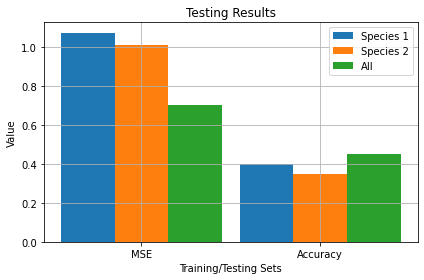

In [19]:
x=np.array([1,2])
width=0.3

fig, ax = plt.subplots()

ax.bar(x-width,[scratch_species_1_test['mse'],
                scratch_species_1_test['%']],
       width,label='Species 1')

ax.bar(x,[scratch_species_2_test['mse'],
                scratch_species_2_test['%']],
       width,label='Species 2')

ax.bar(x+width,[scratch_species_all_test['mse'],
                scratch_species_all_test['%']],
       width,label='All')

ax.set_xticks(x)
ax.set_xticklabels(['MSE','Accuracy'])

ax.set_ylabel('Value');
ax.set_xlabel('Training/Testing Sets')
ax.set_title('Testing Results')
ax.legend()
ax.grid()

fig.tight_layout()
fig.show()

### Training from scatch - Inter-species Results
This plot summarises the results on training on Species 1 and testing on Species 2 (named 1-2), as well as training on Species 2 and testing on Species 1 (mamed 2-1)

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


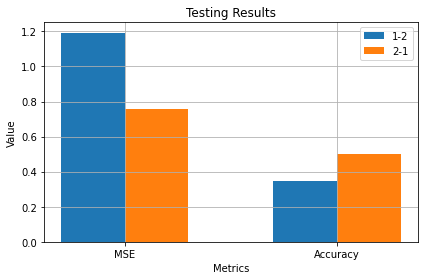

In [20]:

x=np.array([1,2])
width=0.3

fig, ax = plt.subplots()

ax.bar(x-width/2,[scratch_species_12_metrics['mse'],
                scratch_species_12_metrics['%']],
       width,label='1-2')

ax.bar(x+width/2,[scratch_species_21_metrics['mse'],
                scratch_species_21_metrics['%']],
       width,label='2-1')

ax.set_xticks(x)
ax.set_xticklabels(['MSE','Accuracy'])

ax.set_ylabel('Value');
ax.set_xlabel('Metrics')
ax.set_title('Testing Results')
ax.legend()
ax.grid()

fig.tight_layout()
fig.show()

### CVPPP Pretraining - Intra-species Results

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


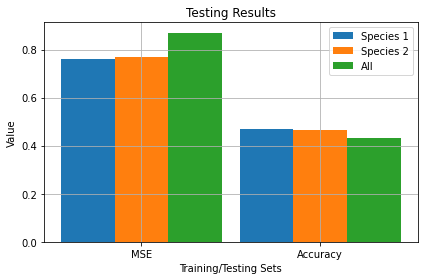

In [21]:
species1_cvres_metrics = compute_metrics(species1_cvres[:,0],species1_cvres[:,1])
species2_cvres_metrics = compute_metrics(species2_cvres[:,0],species2_cvres[:,1])
speciesall_cvres_metrics = compute_metrics(speciesall_cvres[:,0],speciesall_cvres[:,1])

x=np.array([1,2])
width=0.3

fig, ax = plt.subplots()

ax.bar(x-width,[species1_cvres_metrics['mse'],
                species1_cvres_metrics['%']],
       width,label='Species 1')

ax.bar(x,[species2_cvres_metrics['mse'],
                species2_cvres_metrics['%']],
       width,label='Species 2')

ax.bar(x+width,[speciesall_cvres_metrics['mse'],
                speciesall_cvres_metrics['%']],
       width,label='All')

ax.set_xticks(x)
ax.set_xticklabels(['MSE','Accuracy'])

ax.set_ylabel('Value');
ax.set_xlabel('Training/Testing Sets')
ax.set_title('Testing Results')
ax.legend()
ax.grid()

fig.tight_layout()
fig.show()

### CVPPP Results - Inter-species Results
This plot summarises the results on training on Species 1 and testing on Species 2 (named 1-2), as well as training on Species 2 and testing on Species 1 (mamed 2-1)

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


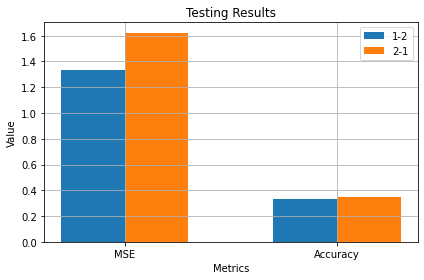

In [22]:
species12_cvres_metrics = compute_metrics(species12_cvres[:,0],species12_cvres[:,1])
species21_cvres_metrics = compute_metrics(species21_cvres[:,0],species21_cvres[:,1])


x=np.array([1,2])
width=0.3

fig, ax = plt.subplots()

ax.bar(x-width/2,[species12_cvres_metrics['mse'],
                species12_cvres_metrics['%']],
       width,label='1-2')

ax.bar(x+width/2,[species21_cvres_metrics['mse'],
                species21_cvres_metrics['%']],
       width,label='2-1')

ax.set_xticks(x)
ax.set_xticklabels(['MSE','Accuracy'])

ax.set_ylabel('Value');
ax.set_xlabel('Metrics')
ax.set_title('Testing Results')
ax.legend()
ax.grid()

fig.tight_layout()
fig.show()

In [23]:
[species12_cvres_metrics['mse'],species21_cvres_metrics['mse']]

[1.3313135261923377, 1.622361219702893]

### Training from scratch vs fine-tuning comparison
#### Intra-species comparison

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


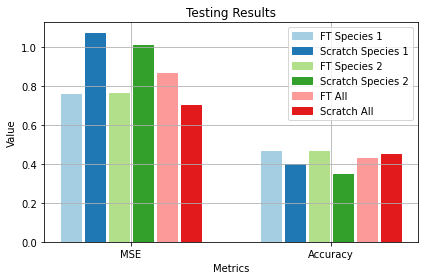

In [24]:
x=np.array([1,4])
width=0.3

x_values = [x+delta for delta in np.linspace(-width*3,width*3,6)]

fig, ax = plt.subplots()

ax.bar(x_values[0],[species1_cvres_metrics['mse'],
                species1_cvres_metrics['%']],
       width,label='FT Species 1')

ax.bar(x_values[1],[scratch_species_1_test['mse'],
                scratch_species_1_test['%']],
       width,label='Scratch Species 1')

ax.bar(x_values[2],[species2_cvres_metrics['mse'],
                species2_cvres_metrics['%']],
       width,label='FT Species 2')

ax.bar(x_values[3],[scratch_species_2_test['mse'],
                scratch_species_2_test['%']],
       width,label='Scratch Species 2')

ax.bar(x_values[4],[speciesall_cvres_metrics['mse'],
                speciesall_cvres_metrics['%']],
       width,label='FT All')

ax.bar(x_values[5],[scratch_species_all_test['mse'],
                scratch_species_all_test['%']],
       width,label='Scratch All')

is_bg = lambda r: (r.get_width()==1) and (r.get_height()==1) and (r.xy == (0,0))

bars = sorted([ b for b in ax.get_children() 
               if (type(b) ==  mpl.patches.Rectangle) and not is_bg(b)
              ],key=lambda x:x.xy[0])
cm = pylab.get_cmap('Paired')(np.arange(int((len(bars))/2)))
cm = np.concatenate([cm,cm])


for bar,color in zip(bars,cm):
    bar.set_color(color)


ax.set_xticks(x)
ax.set_xticklabels(['MSE','Accuracy'])

ax.set_ylabel('Value');
ax.set_xlabel('Metrics')
ax.set_title('Testing Results')
ax.legend()
ax.grid()

fig.tight_layout()
fig.show()

#### Inter-species comparison

/home/tuttoweb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


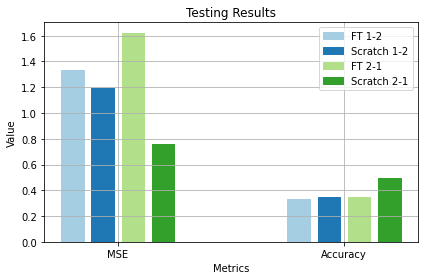

In [25]:
x=np.array([1,4])

x_values = [x+delta for delta in np.linspace(-width*2,width*2,4)]
width=0.3

fig, ax = plt.subplots()

ax.bar(x_values[0],[species12_cvres_metrics['mse'],
                species12_cvres_metrics['%']],
       width,label='FT 1-2')

ax.bar(x_values[1],[scratch_species_12_metrics['mse'],
                scratch_species_12_metrics['%']],
       width,label='Scratch 1-2')

ax.bar(x_values[2],[species21_cvres_metrics['mse'],
                species21_cvres_metrics['%']],
       width,label='FT 2-1')

ax.bar(x_values[3],[scratch_species_21_metrics['mse'],
                scratch_species_21_metrics['%']],
       width,label='Scratch 2-1')

bars = sorted([ b for b in ax.get_children() 
               if (type(b) ==  mpl.patches.Rectangle) and not is_bg(b)
              ],key=lambda x:x.xy[0])
cm = pylab.get_cmap('Paired')(np.arange(int((len(bars))/2)))
cm = np.concatenate([cm,cm])


for bar,color in zip(bars,cm):
    bar.set_color(color)

ax.set_xticks(x)
ax.set_xticklabels(['MSE','Accuracy'])

ax.set_ylabel('Value');
ax.set_xlabel('Metrics')
ax.set_title('Testing Results')
ax.legend()
ax.grid()

fig.tight_layout()
fig.show()

## Conclusion

Trained model in [1] using two training strategies

* Training the model from scratch
* Fine tuning a pretrained model using CVPPP dataset as in [2]

I used the WUR dataset as follows:
* Images marked as "b" were used a testing (80%) and validation (20%) making sure that the same plant (at different growth stages) are in both splits
* Rest of the images are using from training

In both cases I considered the following training sets

* Only Species 1
* Only Species 2
* Both Species used as training

I considered the following testing strategies
* Intra-species: training on Species X -> testing on Species X
* Inter-species: training on Species X -> testing on Species Y

Findings summary:

* Fine-tuned models from CVPPP work better in the single species (either 1 or 2) experiments
* Models trained from scratch work better when both Species are used at the same time
* The models trained from scatch generalise better than the fine-tuned models for the inter-species test


Things to keep on eye:

* It is odd that when the model is trained from scratch, the 2-1 (trained on species 2 - testing on species 1) test experiment perform better than the 1-1 (trained on species 1 - testing on species 1) - MSE 0.76 vs 1.1. I think this is happening because Species 1 has a restricted leaf count than Species 2. This might require further investigation


## References

[1] Mario Valerio Giuffrida, Peter Doerner, Sotirios A. Tsaftaris (2018) "Pheno-Deep Counter: a unified and versatile deep learning architecture for leaf counting," The Plant Journal.

[2] Andrei Dobrescu, Mario Valerio Giuffrida, Sotirios A. Tsaftaris (2017) "Leveraging multiple datasets for deep leaf counting," Workshop: Computer Vision Problems in Plant Phenotyping (CVPPP), ICCV.